In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('../artifacts/sentiment_analysis.csv')


In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preproscessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

Convert Uppercase to lovercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Links

In [10]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [11]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuations

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [14]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [15]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Numbers

In [16]:
data["tweet"]  = data["tweet"].str.replace('\d+', '', regex=True)

In [17]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [24]:
data["tweet"].head()


0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [27]:
data["tweet"].head()


0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Bulding Vacabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [31]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [32]:
len(vocab)

15949

In [33]:
tokens=[key for key in vocab if vocab[key]> 10]

In [34]:
len(tokens)

1145

In [35]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [36]:
data


,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [37]:
X= data["tweet"]
y= data["label"]

In [38]:
!pip install scikit-learn

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train.shape

(6336,)

In [42]:
X_train

1160    rt gari rt melissatweet app store cave islamof...
2888    tv shop done realli happi got game film ps sam...
5989    mona wow tough real talk well unlimit mm appl ...
343     “drshwetapuri appl work iphon run io wasnt iph...
5683    hi im chriswint left appl iphon microsoft wind...
                              ...                        
7378    fresh donrik new rayban samsung note sungl sun...
314     reason id get iphon bc supercool case especi o...
109     ad twitter directori newyorkni iphon fun educ mom
1500    appl bunch crook refus repairreplac beat wirel...
6540    new case unicorn glitter soni z case handyhül ...
Name: tweet, Length: 6336, dtype: object

In [43]:
X_test

1196    grab hand pleas appl cockhead big dick enorm h...
2639    hey guy look motorolamotogthgenerationxtgbblac...
2096    benghazi victim’ widow blasts… news photograph...
6335    dec martian candi kingcrowley king kushk ink i...
5971    mom emili got new phone dad new plan sprint ca...
                              ...                        
4538               appl sorri calendar spam appl everyday
70      feel broken phone screen replac iphon happi pi...
1651    first iphon iphon plu birthday steve job birth...
6925                   iphon appl product ill ever somuch
3538    soooooadd rfleme ps playstat soni psn consol n...
Name: tweet, Length: 1584, dtype: object

In [44]:
y_train

1160    1
2888    0
5989    0
343     1
5683    1
       ..
7378    0
314     0
109     0
1500    1
6540    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [45]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [46]:
vectorized_x_train = vectorizer(X_train, tokens)

In [47]:
vectorized_x_test = vectorizer(X_test, tokens)

In [48]:
vectorized_x_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_train


1160    1
2888    0
5989    0
343     1
5683    1
       ..
7378    0
314     0
109     0
1500    1
6540    0
Name: label, Length: 6336, dtype: int64

In [50]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
y_test

1196    0
2639    0
2096    0
6335    0
5971    0
       ..
4538    1
70      0
1651    0
6925    1
3538    0
Name: label, Length: 1584, dtype: int64

In [52]:
y_train.value_counts()

label
0    4702
1    1634
Name: count, dtype: int64

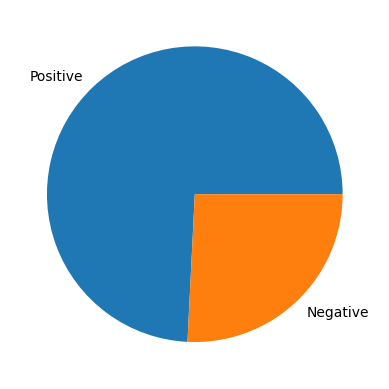

In [53]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

#### Handle Imbalanced dataset

In [54]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 435.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/257.7 kB 655.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 656.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 656.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 656.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 656.4 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 266.9 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 266.9 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 266.9 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9404, 1145) (9404,)


In [61]:
y_train_smote.value_counts()

label
1    4702
0    4702
Name: count, dtype: int64

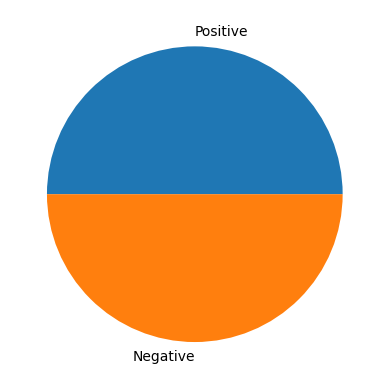

In [62]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [64]:
vectorized_x_train_smote

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17509288, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [59]:
y_train_smote

0       1
1       0
2       0
3       1
4       1
       ..
9399    1
9400    1
9401    1
9402    1
9403    1
Name: label, Length: 9404, dtype: int64

In [65]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_test

1196    0
2639    0
2096    0
6335    0
5971    0
       ..
4538    1
70      0
1651    0
6925    1
3538    0
Name: label, Length: 1584, dtype: int64

## Model Training & Evaluation

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [69]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [70]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [72]:
y_train_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [73]:
y_train_smote

0       1
1       0
2       0
3       1
4       1
       ..
9399    1
9400    1
9401    1
9402    1
9403    1
Name: label, Length: 9404, dtype: int64

In [74]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.918
	Recall = 0.969
	F1-Score = 0.943


In [76]:
y_test_pred = lr.predict(vectorized_x_test)

In [77]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [78]:
y_test

1196    0
2639    0
2096    0
6335    0
5971    0
       ..
4538    1
70      0
1651    0
6925    1
3538    0
Name: label, Length: 1584, dtype: int64

In [79]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.873
	Precision = 0.704
	Recall = 0.842
	F1-Score = 0.767


### Naive Bayes

In [80]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.91
	Precision = 0.871
	Recall = 0.963
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.867
	Precision = 0.673
	Recall = 0.903
	F1-Score = 0.771


### Decision Tree

In [81]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.819
	Precision = 0.636
	Recall = 0.633
	F1-Score = 0.634


### Random Forest

In [82]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.864
	Precision = 0.736
	Recall = 0.704
	F1-Score = 0.72


### Support Vector machine

In [83]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.995
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.879
	Precision = 0.732
	Recall = 0.809
	F1-Score = 0.768


In [86]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr,file)